# Your name: Krissy Wong
## Assignment Name: CA03 - Decision Tree Algorithm


# Part 1
## 1. Data Quality Analysis
#### Do all of these inside your Notebook: 
#####• Perform a Data Quality Analysis to find missing values, outliers, NaNs etc. 
#####• Display descriptive statistics of each column 
#####• Perform necessary data cleansing and transformation based on your observations from the data quality analysis

In [152]:
#Import packages and programs needed for Data Quality Analysis 
import pandas as pd 
import matplotlib.pyplot as plt

In [153]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [154]:
# Read datasets and look at the head(10) of the data 
census_data = pd.read_csv('/gdrive/MyDrive/BSAN6070/CA03/census_data.csv')
census_data.head(10)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
5,b. 31-40,e. High,c. High,a. = 0,b. Mid,d. 14,d. Masters,b. income,d. 36-40 & 56-60,train,0
6,a. 0-30,a. Low,b. Mid,a. = 0,a. Low,a. 0-8,a. Low,b. income,e. 40-55,train,0
7,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,1
8,d. 41-50 & 61-70,e. High,b. Mid,c. > 0,b. Mid,d. 14,d. Masters,b. income,c. 31-35 & 61-70,train,1
9,b. 31-40,e. High,c. High,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,1


In [155]:
# Look at the tail of the dataset 

census_data.tail(10)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
48832,d. 41-50 & 61-70,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,c. 31-35 & 61-70,test,0
48833,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,c. 31-35 & 61-70,test,0
48834,b. 31-40,a. Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,b. income,a. 0-25,test,0
48835,b. 31-40,a. Low,b. Mid,a. = 0,c. High,d. 14,d. Masters,b. income,e. 40-55,test,0
48836,b. 31-40,e. High,a. Low,a. = 0,c. High,c. 13,c. Bachelors,b. income,c. 31-35 & 61-70,test,0
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0
48841,e. 51-60,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,c. 31-35 & 61-70,test,1


In [156]:
# Describes the data according to count, mean, std, min, 25%, 50%, 75%, and max

census_data.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [157]:
# Verify the shape of the data to see the columns and rows 

census_data.shape

(48842, 11)

In [158]:
# Look at the count of records for each column in the dataset 

census_data.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [159]:
# Check all the column types 

census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


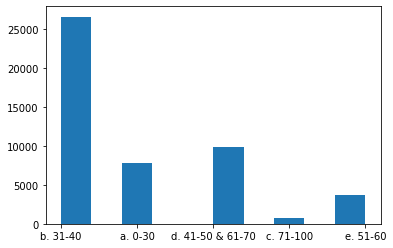

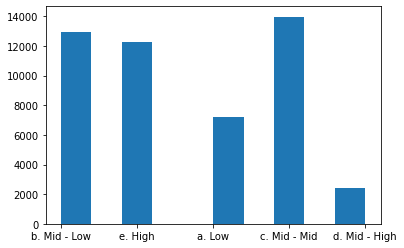

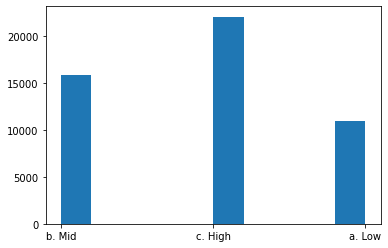

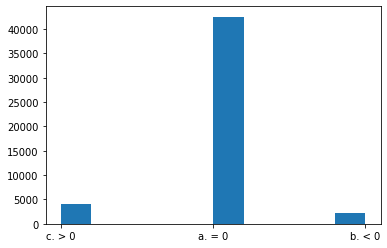

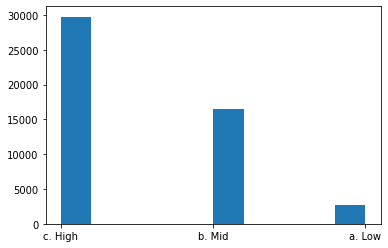

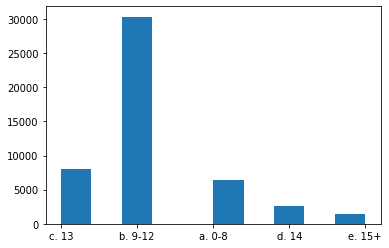

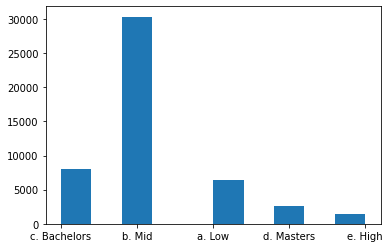

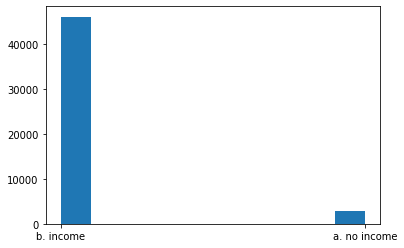

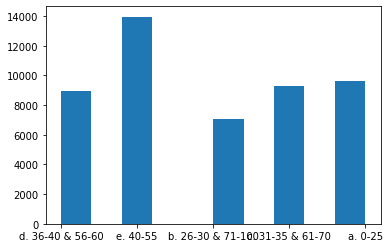

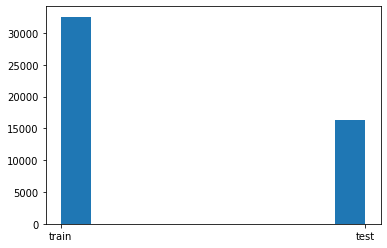

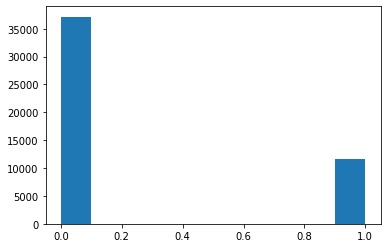

In [160]:
# Create histograms for each column in a for loop to detect outliers
for col in census_data.columns:
  plt.hist(census_data[col])
  plt.show()

## 2. Exploratory Data Analysis (EDA)
### There are 7 explanatory variables: 
#####  1. Age (5 bins)
#####  2. Capital Gain/ Loss (3 bins) 
#####  3. Education (5 bins)
#####  4. Hours per Week (5 bins)
#####  5. Marriage Status and Relationship (3 bins)
#####  6. Occupation (5 bins)
#####  7. Race and Sex (3 bins)   

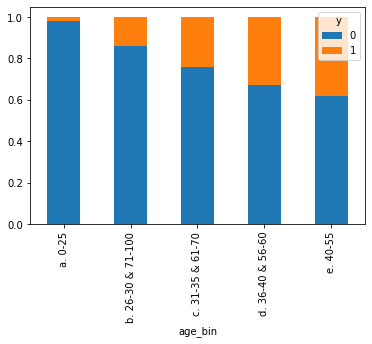

In [163]:
# Age Bin (5 bins)

pd.crosstab(census_data['age_bin'], census_data['y'], normalize = 'index').plot(kind='bar',stacked=True)

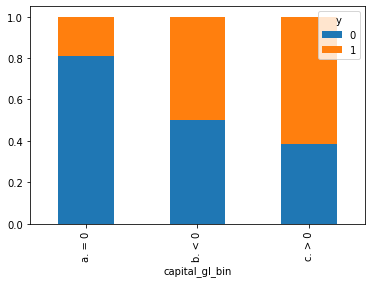

In [164]:
# Capital Gain/Loss bin (3 bins)

pd.crosstab(census_data['capital_gl_bin'], census_data['y'], normalize = 'index').plot(kind='bar',stacked=True)


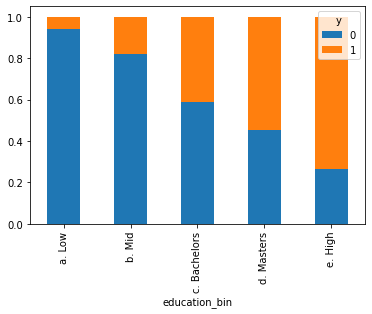

In [165]:
# Education Bin (5 bins)

pd.crosstab(census_data['education_bin'], census_data['y'], normalize = 'index').plot(kind='bar',stacked=True)

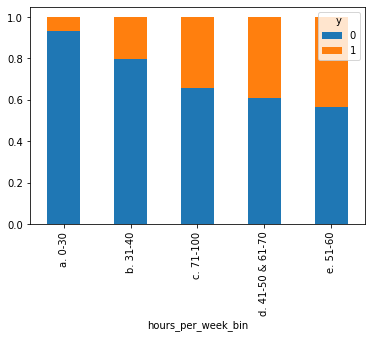

In [166]:
# Hours per week (5 bins) 

pd.crosstab(census_data['hours_per_week_bin'], census_data['y'], normalize = 'index').plot(kind='bar',stacked=True)

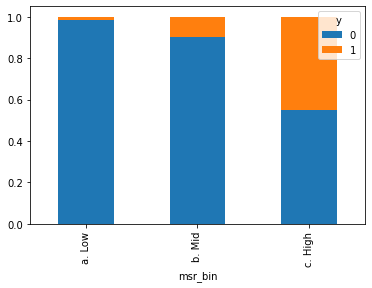

In [167]:
# Marriage Status and Relationship (3 bins)

pd.crosstab(census_data['msr_bin'], census_data['y'], normalize = 'index').plot(kind='bar',stacked=True)

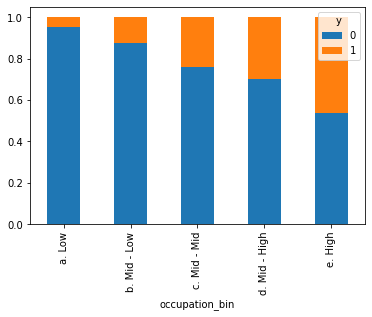

In [168]:
# Occupation (5 bins)

pd.crosstab(census_data['occupation_bin'], census_data['y'], normalize = 'index').plot(kind='bar',stacked=True)

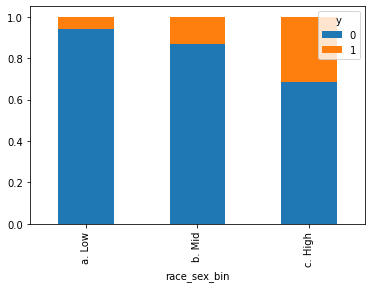

In [169]:
# Race and Sex (3 bins)

pd.crosstab(census_data['race_sex_bin'], census_data['y'], normalize = 'index').plot(kind='bar',stacked=True)

# Part 2

## 3. Build Decision Tree Classifier Models


In [170]:
# Import Package to build Decision Tree Model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing


In [171]:
# Split the data into train set and check the head 

train_set = census_data[census_data['flag'] == 'train']

train_set.head(3)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0


In [172]:
# Split the data into test set and check the head 

test_set = census_data[census_data['flag'] == 'test']

test_set.head(3)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
32561,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,a. 0-8,a. Low,b. income,a. 0-25,test,0
32562,d. 41-50 & 61-70,b. Mid - Low,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,test,0
32563,b. 31-40,d. Mid - High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,b. 26-30 & 71-100,test,1


In [173]:
# Selecting independant and dependant variables from the datasets 

X_train = pd.get_dummies(train_set[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin','workclass_bin']],drop_first=True)
y_train=train_set['y']
X_test=pd.get_dummies(test_set[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin','workclass_bin']],drop_first=True)
y_test=test_set['y']

In [174]:
# Create Ordinal Encoder to transform categorical variables to numerical variables 
# The ordinal encoder allows us to transform all the data from the dataset in one step

oe = preprocessing.OrdinalEncoder()

In [175]:
# Encode train data sets (X_train)

oe.fit(X_train)
X_train= oe.transform(X_train)
X_train= pd.DataFrame(X_train)

X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [176]:
# Encode test data sets 
oe.fit(X_test)
X_test= oe.transform(X_test)
X_test= pd.DataFrame(X_test)

X_test.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [177]:
# Build a decision tree by calling in the DecisionTreeClassifier into the varibale

dtree = DecisionTreeClassifier(max_depth = 10, random_state = 101, 
                             max_features = None, min_samples_leaf = 15)
# Fit the data 
dtree.fit(X_train,y_train)

# Predict 
y_pred=dtree.predict(X_test)


## 4. Visualize Your Decision Tree using GraphViz

##### Get the detail of how to do this from the following link: 
https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

In [178]:
# import packages to visualize my decision tree 
 
from six import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz 
import pydotplus


In [179]:
# Visualize decision tree with a dot graph 
dot_data = StringIO()

export_graphviz(dtree, out_file= dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.


## 5. Evaluate Decision Tree Performance 

##### Calculate and display the following. Do all of these inside your Notebook. 
###### • Confusion Matrix (TP, TN, FP, FN ... etc.) 
###### • Accuracy, Precision, Recall, F1 Score, AUC Value, ROC Curve (graph) 


In [180]:
import sklearn.metrics as metrics 

# Print Confusion Matrix to describe the number of true positives, false positives, 
# true negatives and false negatives 

census_data_confusion = confusion_matrix(y_test,y_pred)
print(census_data_confusion)


[[11521   914]
 [ 1653  2193]]


In [181]:
# Print accuracy of model 

accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

# The model has an accuracy of 84.4%. 

Accuracy: 0.8423315521159634


In [182]:
# Print classification_report to see indicators such as precision, recall, 
# f1-score and support for the model.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.83      0.84      0.84     16281



In [183]:
# Calculate the area under the curve "AUC Value" 

roc_auc_score(y_test, y_pred)

# The AUC has a score of %74.5. 

0.7483502983062628

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


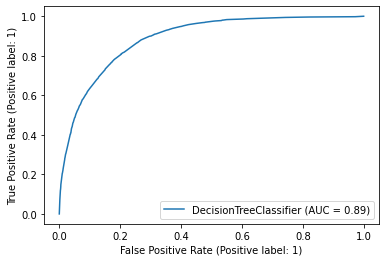

In [184]:
# Visualize the ROC Curve 

roc_plot = plot_roc_curve(dtree, X_test, y_test) 
plt.show()


# Part 3 
## 6. Tune Decision Tree Performance 

##### Learn about all hyper-parameters and methods of Scikit Learn DecisionTreeClassifier algorithm at: 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [185]:
# Tune the decision tree with different parameters and build different models to assess which model is the best. 

###### Gini Impurity 

In [186]:
# Tree 1 

dtree_1 = DecisionTreeClassifier(min_samples_split=10,max_depth=10, min_samples_leaf=15)
dtree_1.fit(X_train,y_train)
y_pred_1 = dtree_1.predict(X_test)

accuracy_1 = accuracy_score(y_test, y_pred_1)
print('TREE 1')
print("Accuracy:",accuracy_1)
print('')
print(classification_report(y_test, y_pred_1))

TREE 1
Accuracy: 0.8423315521159634

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.83      0.84      0.84     16281



In [187]:
# Tree 2 

dtree_2 = DecisionTreeClassifier(min_samples_split= 5,max_depth = 5, min_samples_leaf=10)
dtree_2.fit(X_train,y_train)
y_pred_2 = dtree_2.predict(X_test)

accuracy_2 = accuracy_score(y_test, y_pred_2)
print('TREE 2')
print("Accuracy:",accuracy_1)
print('')
print(classification_report(y_test, y_pred_2))

TREE 2
Accuracy: 0.8423315521159634

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     12435
           1       0.70      0.48      0.57      3846

    accuracy                           0.83     16281
   macro avg       0.78      0.71      0.73     16281
weighted avg       0.82      0.83      0.82     16281



In [190]:
# Tree 3

dtree_3 = DecisionTreeClassifier(min_samples_split= 2,max_depth = 2, min_samples_leaf=5)
dtree_3.fit(X_train,y_train)
y_pred_3 = dtree_3.predict(X_test)

accuracy_3 = accuracy_score(y_test, y_pred_3)
print('TREE 3')
print("Accuracy:",accuracy_3)
print('')
print(classification_report(y_test, y_pred_3))

TREE 3
Accuracy: 0.8165960321847552

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     12435
           1       0.70      0.40      0.51      3846

    accuracy                           0.82     16281
   macro avg       0.77      0.67      0.70     16281
weighted avg       0.80      0.82      0.80     16281



In [191]:
# Tree 4

dtree_4 = DecisionTreeClassifier(min_samples_split= 7,max_depth = 7, min_samples_leaf=10)
dtree_4.fit(X_train,y_train)
y_pred_4 = dtree_4.predict(X_test)

accuracy_4 = accuracy_score(y_test, y_pred_4)
print('TREE 4')
print("Accuracy:",accuracy_4)
print('')
print(classification_report(y_test, y_pred_4))

TREE 4
Accuracy: 0.8361894232540998

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.69      0.55      0.61      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.75     16281
weighted avg       0.83      0.84      0.83     16281



###### Entropy



In [192]:
# Tree 5 
dtree_5 = DecisionTreeClassifier(criterion='entropy', min_samples_split=2,max_depth=10, min_samples_leaf=15)
dtree_5.fit(X_train,y_train)
y_pred_5 = dtree_5.predict(X_test)

accuracy_5 = accuracy_score(y_test, y_pred_5)
print('TREE 5')
print("Accuracy:",accuracy_5)
print('')
print(classification_report(y_test, y_pred_5))

TREE 5
Accuracy: 0.8424543946932007

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.83      0.84      0.84     16281



In [193]:
# Tree 6 
dtree_6 = DecisionTreeClassifier(criterion='entropy', min_samples_split=2,max_depth=7, min_samples_leaf=15)
dtree_6.fit(X_train,y_train)
y_pred_6 = dtree_6.predict(X_test)

accuracy_6 = accuracy_score(y_test, y_pred_6)
print('TREE 6')
print("Accuracy:",accuracy_6)
print('')
print(classification_report(y_test, y_pred_6))

TREE 6
Accuracy: 0.8373564277378539

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.69      0.56      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281



In [194]:
# Tree 7 
dtree_7 = DecisionTreeClassifier(criterion='entropy', min_samples_split=2,max_depth=7, min_samples_leaf=20)
dtree_7.fit(X_train,y_train)
y_pred_7 = dtree_7.predict(X_test)

accuracy_7 = accuracy_score(y_test, y_pred_7)
print('TREE 7')
print("Accuracy:",accuracy_7)
print('')
print(classification_report(y_test, y_pred_7))

TREE 7
Accuracy: 0.8368036361402862

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.69      0.55      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281



In [195]:
# Tree 8 
dtree_8 = DecisionTreeClassifier(criterion='entropy', min_samples_split=2,max_depth=10, min_samples_leaf=20)
dtree_8.fit(X_train,y_train)
y_pred_8 = dtree_8.predict(X_test)

accuracy_8 = accuracy_score(y_test, y_pred_8)
print('TREE 8')
print("Accuracy:",accuracy_8)
print('')
print(classification_report(y_test, y_pred_8))

TREE 8
Accuracy: 0.8430071862907684

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.84      0.84      0.84     16281




## 7. Conclusion

##### Explain your observations from the above performance tuning effort.  

In [196]:
# Q.8.1  How long was your total run time to train the model?


import timeit
code_to_test = """
a = range(100000)
b = []
for i in a:
    b.append(i*2)
"""
elapsed_time = timeit.timeit(code_to_test, number=100)/100
print(elapsed_time)

0.014885366840026108


In [197]:
# Q.8.2  Did you find the BEST TREE?

# I found the best tree by looking at the accuracy percentage. In this case, the best tree
# was Tree 8 with an accuracy of 0.843. 

In [198]:
 # Q.8.3  Draw the Graph of the BEST TREE Using GraphViz 
dot_data = StringIO()
export_graphviz(dtree_8, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [199]:
# Q.8.4  What makes it the best tree?

# This is the best tree because it has the highest accuracy at 0.843.

# Part 4 
## 8. Tune Decision Tree Performance 

##### Instead of running your program manually eight times for eight cases, can you “automate” generation of the above “Hyperparameter Vs. Model Performance Table” in your code itself, so that the completed performance table can be displayed with all eight cases by running it only once? 

In [200]:
# Q.7.1 Decision Tree Hyper-parameter variation vs. performance (run your program 
# manually for the following eight cases and enter the Model Performance values 
# manually in the table) 
 
 # Refer to code below. 


In [201]:
# Create an excel file which contains the data of the parameters, read csv file into dataframe,
# and make a for loop to iterate through the parameters adn print performance scores 
# for each tree.

tree_tuning = pd.read_csv('/gdrive/MyDrive/BSAN6070/CA03/CA03_Krissy_Wong_Tree_Tuning_Cases.csv')
tree_tuning = pd.DataFrame(tree_tuning)
tree_tuning 


,Tree Number,Split Criteria (Entropy or Gini),Minimum Sample Split,Minimum Sample Leaf,Maximum Depth,Accuracy,Recall,Precision,F1 Score
0,1,Gini Impurity,10,15,10,0.8423,0.84,0.83,0.84
1,2,Gini Impurity,5,10,5,0.8423,0.83,0.82,0.82
2,3,Gini Impurity,2,5,2,0.8165,0.82,0.80,0.80
3,4,Gini Impurity,7,10,7,0.8361,0.84,0.83,0.83
4,5,Entropy,2,15,10,0.8424,0.84,0.83,0.84
5,6,Entropy,2,15,7,0.8373,0.84,0.83,0.83
6,7,Entropy,2,20,7,0.8368,0.84,0.83,0.83
7,8,Entropy,2,20,10,0.8430,0.84,0.84,0.84


In [ ]:
for i in range(len(tree_tuning)):
  if tree_tuning['Split Criteria (Entropy or Gini)'][i] == 'Entropy':

    dtree = DecisionTreeClassifier(criterion='entropy', 
                                   min_samples_split = tree_tuning['Minimum Sample Split'][i],
                                   max_depth = tree_tuning['Maximum Depth'][i], 
                                   min_samples_leaf = tree_tuning['Minimum Sample Leaf'][i])
    dtree.fit(X_train,y_train)
    y_pred=dtree.predict(X_test)
    print('Criteria: ENTROPY')
    accuracy=accuracy_score(y_test, y_pred)
    print("Accuracy:",accuracy)

    print(classification_report(y_test, y_pred))
    print('----------------------------------------------------------')
  else:

    dtree=DecisionTreeClassifier(min_samples_split = tree_tuning['Minimum Sample Split'][i],
                                 max_depth = tree_tuning['Maximum Depth'][i],
                                 min_samples_leaf = tree_tuning['Minimum Sample Leaf'][i])
    dtree.fit(X_train,y_train)
    y_pred=dtree.predict(X_test)
    print('Criteria: GINI')
    accuracy=accuracy_score(y_test, y_pred)
    print("Accuracy:",accuracy)

    print(classification_report(y_test, y_pred))
    print('----------------------------------------------------------')

# Part 5 
## 6. Prediction using your “trained” Decision Tree Model 
##### Based on the Performance Tuning effort in the previous section, pick your BEST 
##### PERFORMING TREE. Now make prediction of a “new” individual’s Income Category ( <=50K, or >50K ) with the following information. Do this in your Notebook. 
• Hours Worked per Week = 48 

• Occupation Category = Mid - Low 

• Marriage Status & Relationships = High 

• Capital Gain = Yes 

• Race-Sex Group = Mid 

• Number of Years of Education = 12 

• Education Category = High 

• Work Class = Income 

• Age = 58

In [ ]:
# Make a new dataframe and make predictions using trained Decision Tree Model 

In [ ]:
df = pd.DataFrame({'age_bin_b. 26-30 & 71-100':0,'age_bin_c. 31-35 & 61-70':0,'age_bin_d. 36-40 & 56-60':1,'age_bin_e. 40-55':0,'capital_gl_bin_b. < 0':0,'capital_gl_bin_c. > 0':1,'education_bin_b. Mid':0,'education_bin_c. Bachelors':0,'education_bin_d. Masters':0,'education_bin_e. High':1,'hours_per_week_bin_b. 31-40':0,'hours_per_week_bin_c. 71-100':0,'hours_per_week_bin_d. 41-50 & 61-70':1,'hours_per_week_bin_e. 51-60':0,'msr_bin_b. Mid':0,'msr_bin_c. High':1,'occupation_bin_b. Mid - Low':1,'occupation_bin_c. Mid - Mid':0,'occupation_bin_d. Mid - High':0,'occupation_bin_e. High':0,'race_sex_bin_b. Mid':1,'race_sex_bin_c. High':0,'education_num_bin_b. 9-12':1,'education_num_bin_c. 13':0,'education_num_bin_d. 14':0,'education_num_bin_e. 15+':0,'workclass_bin_b. income':1},index=[0])
df

,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55,capital_gl_bin_b. < 0,capital_gl_bin_c. > 0,education_bin_b. Mid,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,msr_bin_b. Mid,msr_bin_c. High,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,race_sex_bin_b. Mid,race_sex_bin_c. High,education_num_bin_b. 9-12,education_num_bin_c. 13,education_num_bin_d. 14,education_num_bin_e. 15+,workclass_bin_b. income
0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1


In [ ]:
# Run Decision Tree algorithmm using new dataframe. 

In [ ]:
dtree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split= 2,max_depth= 10, min_samples_leaf=20)

dtree.fit(X_train,y_train)


# Q.10.1 What is the probability of the outcome of the prediction for this ? What is 
# your decision probability threshold and what is your predicted decision based on that? 

y_pred = dtree.predict(df)
print(y_pred) 
if y_pred == 0:
  print('The income for this type of person is equal or below 50k.')
else:
  print('The income for this type of person is higher than 50k.')

x_prob=[[0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1]]
y_pred=dtree.predict(x_prob)
prob=dtree.predict_proba(x_prob)

# Q. 10.2 What is the probability that your outcome prediction is accurate? 
print('The Confidence of the prediciton is ',prob[0][y_pred])

[0]
The income for this type of person is equal or below 50k.
The Confidence of the prediciton is  [0.72413793]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
